#Question#1

##Creating Dataset

In [1]:
# connecting drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd '/content/drive/MyDrive/COMP-8610/Datasets'
%ls

/content/drive/MyDrive/COMP-8610/Datasets
Q1Dataset.csv  Q2Dataset.csv


In [3]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [613]:
np.random.seed(1)
x = np.random.normal(0, 1, 5000) # generating 5000 instances from distribution N (0,1)
eps = np.random.normal(0, np.sqrt(0.25), 5000) # generating 5000 instances from distribution N (0,0.25)
y = -1 + 0.5 * x - 2 * x**2 + 0.3 * x**3 + eps

In [614]:
len(x), len(y)

(5000, 5000)

In [615]:
x0 = [1]*5000

In [616]:
data = pd.DataFrame(x0, columns=['x0']) #bias
data["x"]=x
data["x2"]=x**2
data["x3"]=x**3
data["y"]=y

In [617]:
data

,x0,x,x2,x3,y
0,1,1.624345,2.638498,4.285832,-4.641451
1,1,-0.611756,0.374246,-0.228947,-1.558609
2,1,-0.528172,0.278965,-0.147342,-2.430615
3,1,-1.072969,1.151262,-1.235268,-4.571957
4,1,0.865408,0.748930,0.648130,-1.558932
...,...,...,...,...,...
4995,1,1.604546,2.574569,4.131014,-4.071081
4996,1,0.566613,0.321050,0.181911,-1.059670
4997,1,-0.775988,0.602157,-0.467267,-3.239560
4998,1,1.084889,1.176983,1.276896,-2.459802


In [618]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [619]:
data.to_csv('Q1Dataset.csv', index=False)  #storing dataset

#Importing Dataset

In [4]:
data = pd.read_csv('Q1Dataset.csv') #reading dataset
data

,x0,x,x2,x3,y
0,1,1.624345,2.638498,4.285832,-4.641451
1,1,-0.611756,0.374246,-0.228947,-1.558609
2,1,-0.528172,0.278965,-0.147342,-2.430615
3,1,-1.072969,1.151262,-1.235268,-4.571957
4,1,0.865408,0.748930,0.648130,-1.558932
...,...,...,...,...,...
4995,1,1.604546,2.574569,4.131014,-4.071081
4996,1,0.566613,0.321050,0.181911,-1.059670
4997,1,-0.775988,0.602157,-0.467267,-3.239560
4998,1,1.084889,1.176983,1.276896,-2.459802


In [5]:
# weights = np.random.rand(data.shape[1]-1)
# weights

##Adaline Neuron

###BGD

In [6]:
learning_rate = 0.1
epochs = 20

In [7]:
def adaline_activation(weighted_sum):
  return weighted_sum


In [8]:
def adaline_bgd(data, labels, learning_rate=0.0001, epochs=5):
  weights = np.array([0.30903487, 0.14895414, 0.71205955, 0.92752802])
  # print(weights)
  epoch_loss= []
  for i in range(epochs):
    iter_loss = []
    delta_weight = np.zeros(weights.shape)
    for j in range(len(data)):
      row_j = data.iloc[j]
      target = labels.iloc[j]
      weighted_sum = np.dot(row_j, weights)
      prediction = adaline_activation(weighted_sum)
      loss = 1/2*((target-prediction)**2)
      iter_loss.append(loss)
      delta_weight = delta_weight + learning_rate*((target-prediction)*row_j)

    weights = weights + delta_weight
    average_loss = sum(iter_loss)/len(iter_loss)
    epoch_loss.append(average_loss)
    print(f"Epoch {i+1} loss: {average_loss}")

  print(f"Average loss of all epochs {sum(epoch_loss)/len(epoch_loss)}", "\n")
  return weights

def pred_adaline_bgd(data, weights):
  w_sum =  np.dot(data, weights)
  return adaline_activation(w_sum)

In [9]:
from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler().fit_transform(data.iloc[:, :-1])
scaled_data = pd.DataFrame(scaled_data, columns=["x0", "x", "x2", "x3"])
scaled_data["y"]= data.iloc[:, -1]

In [10]:
train_data, test_data = train_test_split(scaled_data , test_size=0.2, random_state=42)
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

In [11]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores = []


for train_index, val_index in kf.split(X_train):
    print(f"****************** K-FOLD: {len(mse_scores)+1} ******************")
    train_data, val_data = X_train.iloc[train_index], X_train.iloc[val_index]
    train_labels, val_labels = y_train.iloc[train_index], y_train.iloc[val_index]

    weights = adaline_bgd(train_data, train_labels)

    val_pred = pred_adaline_bgd(val_data, weights)
    val_mse = mean_squared_error(val_labels, val_pred)
    mse_scores.append(val_mse)

average_loss = sum(mse_scores)/len(mse_scores)
print("Average Validation Loss:", average_loss)

****************** K-FOLD: 1 ******************
Epoch 1 loss: 10.961310927595196
Epoch 2 loss: 7.160221400205166
Epoch 3 loss: 5.620793681863663
Epoch 4 loss: 4.994327685527188
Epoch 5 loss: 4.738985862661554
Average loss of all epochs 6.695127911570554 

****************** K-FOLD: 2 ******************
Epoch 1 loss: 10.82031009323895
Epoch 2 loss: 7.1438848307540965
Epoch 3 loss: 5.633137372791974
Epoch 4 loss: 5.01018381255373
Epoch 5 loss: 4.753035891856867
Average loss of all epochs 6.6721104002391245 

****************** K-FOLD: 3 ******************
Epoch 1 loss: 10.653505644200944
Epoch 2 loss: 7.126925029563759
Epoch 3 loss: 5.649008942273797
Epoch 4 loss: 5.023996558632768
Epoch 5 loss: 4.7589475365485265
Average loss of all epochs 6.642476742243959 

****************** K-FOLD: 4 ******************
Epoch 1 loss: 10.822373611501497
Epoch 2 loss: 7.150766976875796
Epoch 3 loss: 5.637649547847562
Epoch 4 loss: 5.011881185670168
Epoch 5 loss: 4.752797243335076
Average loss of all ep

In [12]:
test_pred = pred_adaline_bgd(X_test, weights)
test_mse = mean_squared_error(y_test, test_pred)
print("The mean squared error on the test dataset is:", test_mse)

The mean squared error on the test dataset is: 9.416071449422684


###SGD

In [13]:
learning_rate = 0.5
epochs = 20


In [14]:
def adaline_activation(weighted_sum):
  return weighted_sum

def update_weights(row_j, weights, learning_rate, target, prediction):
  updated_weights = []
  for row, weight in zip(row_j, weights):
    updated_weights.append(weight+learning_rate*(target-prediction)*row)
  return updated_weights

In [15]:
def adaline_sgd(data, labels, learning_rate=0.01, epochs=5):
  weights = np.array([0.30903487, 0.14895414, 0.71205955, 0.92752802])
  epoch_loss= []
  for i in range(epochs):
    iter_loss = []
    for j in range(len(data)):
      row_j = data.iloc[j]
      target = labels.iloc[j]
      weighted_sum = np.dot(row_j, weights)
      prediction = adaline_activation(weighted_sum)
      loss = 1/2*((target-prediction)**2)
      iter_loss.append(loss)
      weights = update_weights(row_j, weights, learning_rate, target, prediction)
    average_loss = sum(iter_loss)/len(iter_loss)
    epoch_loss.append(average_loss)
    print(f"Epoch {i+1} loss: {average_loss}")

  print(f"Average loss of all epochs {sum(epoch_loss)/len(epoch_loss)}","\n")
  return weights

def pred_adaline_sgd(data, weights):
  w_sum =  np.dot(data, weights)
  return adaline_activation(w_sum)

In [16]:
from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler().fit_transform(data.iloc[:, :-1])
scaled_data = pd.DataFrame(scaled_data, columns=["x0", "x", "x2", "x3"])
scaled_data["y"]= data.iloc[:, -1]

In [17]:
train_data, test_data = train_test_split(scaled_data , test_size=0.2, random_state=42)
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

In [18]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores = []


for train_index, val_index in kf.split(X_train):
    print(f"****************** K-FOLD: {len(mse_scores)+1} ******************")
    train_data, val_data = X_train.iloc[train_index], X_train.iloc[val_index]
    train_labels, val_labels = y_train.iloc[train_index], y_train.iloc[val_index]

    weights = adaline_sgd(train_data, train_labels)

    val_pred = pred_adaline_sgd(val_data, weights)
    val_mse = mean_squared_error(val_labels, val_pred)
    mse_scores.append(val_mse)

average_loss = sum(mse_scores)/len(mse_scores)
print("Average Validation Loss:", average_loss)

****************** K-FOLD: 1 ******************
Epoch 1 loss: 4.81129977518896
Epoch 2 loss: 4.643281453166571
Epoch 3 loss: 4.64328660207637
Epoch 4 loss: 4.6432866051773845
Epoch 5 loss: 4.64328660517925
Average loss of all epochs 4.676888208157707 

****************** K-FOLD: 2 ******************
Epoch 1 loss: 4.81144002882532
Epoch 2 loss: 4.653368653054785
Epoch 3 loss: 4.6533698419402905
Epoch 4 loss: 4.653369842872469
Epoch 5 loss: 4.653369842873199
Average loss of all epochs 4.684983641913212 

****************** K-FOLD: 3 ******************
Epoch 1 loss: 4.87924480245229
Epoch 2 loss: 4.643557206393634
Epoch 3 loss: 4.643561576240323
Epoch 4 loss: 4.643561579079306
Epoch 5 loss: 4.643561579081151
Average loss of all epochs 4.6906973486493415 

****************** K-FOLD: 4 ******************
Epoch 1 loss: 4.817995197288009
Epoch 2 loss: 4.654955723207427
Epoch 3 loss: 4.654954975462554
Epoch 4 loss: 4.654954975054717
Epoch 5 loss: 4.654954975054512
Average loss of all epochs 4.

In [19]:
test_pred = pred_adaline_sgd(X_test, weights)
test_mse = mean_squared_error(y_test, test_pred)
print("The mean squared error on the test dataset is:", test_mse)

The mean squared error on the test dataset is: 9.267542763404585


##Sigmoid Neuron

###BGD

In [20]:
learning_rate = 0.1
epochs = 20


In [21]:
def sigmoid_activation(weighted_sum):
  return 1/(1+np.exp(-weighted_sum))


In [23]:
def sigmoid_bgd(data, labels, learning_rate=0.01, epochs=5):
  weights = np.array([0.30903487, 0.14895414, 0.71205955, 0.92752802])
  epoch_loss= []
  for i in range(epochs):
    iter_loss = []
    delta_weight = np.zeros(weights.shape)
    for j in range(len(data)):
      row_j = data.iloc[j]
      target = labels.iloc[j]
      weighted_sum = np.dot(row_j, weights)
      prediction = sigmoid_activation(weighted_sum)
      loss = 1/2*((target-prediction)**2)
      iter_loss.append(loss)
      delta_weight = delta_weight + learning_rate*(target-prediction)*row_j

    weights = weights + delta_weight
    average_loss = sum(iter_loss)/len(iter_loss)
    epoch_loss.append(average_loss)
    print(f"Epoch {i+1} loss: {average_loss}")

  print(f"Average loss of all epochs {sum(epoch_loss)/len(epoch_loss)}","\n")
  return weights


def pred_sigmoid_bgd(data, weights):
  w_sum =  np.dot(data, weights)
  return sigmoid_activation(w_sum)

In [24]:
train_data, test_data = train_test_split(data , test_size=0.2, random_state=42)
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

In [25]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores = []


for train_index, val_index in kf.split(X_train):
    print(f"****************** K-FOLD: {len(mse_scores)+1} ******************")
    train_data, val_data = X_train.iloc[train_index], X_train.iloc[val_index]
    train_labels, val_labels = y_train.iloc[train_index], y_train.iloc[val_index]

    weights = sigmoid_bgd(train_data, train_labels)

    val_pred = pred_sigmoid_bgd(val_data, weights)
    val_mse = mean_squared_error(val_labels, val_pred)
    mse_scores.append(val_mse)

average_loss = sum(mse_scores)/len(mse_scores)
print("Average Validation Loss:", average_loss)

****************** K-FOLD: 1 ******************
Epoch 1 loss: 11.10442748032257


<ipython-input-21-e561a5078ab6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 2 loss: 9.523106412965026
Epoch 3 loss: 9.589110245784013
Epoch 4 loss: 9.60769880927719
Epoch 5 loss: 9.617810093023632
Average loss of all epochs 9.888430608274486 

****************** K-FOLD: 2 ******************
Epoch 1 loss: 11.005186473753964


<ipython-input-21-e561a5078ab6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 2 loss: 9.443717904174688
Epoch 3 loss: 9.509969470854754
Epoch 4 loss: 9.533510079383264
Epoch 5 loss: 9.535542903614658
Average loss of all epochs 9.805585366356265 

****************** K-FOLD: 3 ******************
Epoch 1 loss: 10.791049632012172


<ipython-input-21-e561a5078ab6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 2 loss: 9.156933951212627
Epoch 3 loss: 9.222623472438267
Epoch 4 loss: 9.247361964550512
Epoch 5 loss: 9.258641408461491
Average loss of all epochs 9.535322085735014 

****************** K-FOLD: 4 ******************
Epoch 1 loss: 11.020593868860871


<ipython-input-21-e561a5078ab6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 2 loss: 9.446037384183613
Epoch 3 loss: 9.506912085606766
Epoch 4 loss: 9.530997352673392
Epoch 5 loss: 9.532055742800903
Average loss of all epochs 9.80731928682511 

****************** K-FOLD: 5 ******************
Epoch 1 loss: 11.228544507333854


<ipython-input-21-e561a5078ab6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 2 loss: 9.717746971490783
Epoch 3 loss: 9.774275792312412
Epoch 4 loss: 9.78706116880099
Epoch 5 loss: 9.794356428409703
Average loss of all epochs 10.06039697366955 

****************** K-FOLD: 6 ******************
Epoch 1 loss: 10.77708061227688


<ipython-input-21-e561a5078ab6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 2 loss: 9.254949449513418
Epoch 3 loss: 9.310782861315776
Epoch 4 loss: 9.328434334065326
Epoch 5 loss: 9.331357894683986
Average loss of all epochs 9.600521030371079 

****************** K-FOLD: 7 ******************
Epoch 1 loss: 11.053758045724223


<ipython-input-21-e561a5078ab6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 2 loss: 9.544987335760007
Epoch 3 loss: 9.604993344374762
Epoch 4 loss: 9.621333849542554
Epoch 5 loss: 9.623577920425467
Average loss of all epochs 9.889730099165401 

****************** K-FOLD: 8 ******************
Epoch 1 loss: 11.28833288163907


<ipython-input-21-e561a5078ab6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 2 loss: 9.805594758447873
Epoch 3 loss: 9.865739655411764
Epoch 4 loss: 9.876517322587693
Epoch 5 loss: 9.879104286390787
Average loss of all epochs 10.143057780895436 

****************** K-FOLD: 9 ******************
Epoch 1 loss: 11.02182203288677


<ipython-input-21-e561a5078ab6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 2 loss: 9.37774106164947
Epoch 3 loss: 9.449312297213185
Epoch 4 loss: 9.47107316046789
Epoch 5 loss: 9.48208543669567
Average loss of all epochs 9.760406797782597 

****************** K-FOLD: 10 ******************
Epoch 1 loss: 11.00251971777663


<ipython-input-21-e561a5078ab6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 2 loss: 9.428088838347712
Epoch 3 loss: 9.494288171855514
Epoch 4 loss: 9.507286218242601
Epoch 5 loss: 9.515818335640606
Average loss of all epochs 9.789600256372612 

Average Validation Loss: 19.133661032144722


In [26]:
test_pred = pred_sigmoid_bgd(X_test, weights)
test_mse = mean_squared_error(y_test, test_pred)
print("The mean squared error on the test dataset is:", test_mse)

The mean squared error on the test dataset is: 21.173416793540586


<ipython-input-21-e561a5078ab6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


###SGD

In [27]:
# bias=1
learning_rate = 0.5
epochs = 20


In [28]:
def sigmoid_activation(weighted_sum):
  return 1/(1+np.exp(-weighted_sum))

def update_weights(row_j, weights, learning_rate, target, prediction):
  updated_weights = []
  for row, weight in zip(row_j, weights):
    updated_weights.append(weight+learning_rate*(target-prediction)*row)
  return updated_weights

In [29]:
def sigmoid_sgd(data, labels, learning_rate=0.5, epochs=5):
  weights = np.array([0.30903487, 0.14895414, 0.71205955, 0.92752802])
  epoch_loss= []
  for i in range(epochs):
    iter_loss = []
    for j in range(len(data)):
      row_j = data.iloc[j]
      target = labels.iloc[j]
      weighted_sum = np.dot(row_j, weights)
      prediction = sigmoid_activation(weighted_sum)
      loss = 1/2*((target-prediction)**2)
      iter_loss.append(loss)
      weights = update_weights(row_j, weights, learning_rate, target, prediction)
    average_loss = sum(iter_loss)/len(iter_loss)
    epoch_loss.append(average_loss)
    print(f"Epoch {i+1} loss: {average_loss}")

  print(f"Average loss of all epochs {sum(epoch_loss)/len(epoch_loss)}","\n")
  return weights

def pred_sigmoid_sgd(data, weights):
  w_sum =  np.dot(data, weights)
  return sigmoid_activation(w_sum)


In [30]:
train_data, test_data = train_test_split(data , test_size=0.2, random_state=42)
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

In [31]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores = []


for train_index, val_index in kf.split(X_train):
    print(f"****************** K-FOLD: {len(mse_scores)+1} ******************")
    train_data, val_data = X_train.iloc[train_index], X_train.iloc[val_index]
    train_labels, val_labels = y_train.iloc[train_index], y_train.iloc[val_index]

    weights = sigmoid_sgd(train_data, train_labels)

    val_pred = pred_sigmoid_sgd(val_data, weights)
    val_mse = mean_squared_error(val_labels, val_pred)
    mse_scores.append(val_mse)

average_loss = sum(mse_scores)/len(mse_scores)
print("Average Validation Loss:", average_loss)

****************** K-FOLD: 1 ******************


<ipython-input-28-6216a4e46143>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 1 loss: 9.692733314595381
Epoch 2 loss: 9.634698340496573
Epoch 3 loss: 9.632394343627118
Epoch 4 loss: 9.634209348868012
Epoch 5 loss: 9.631345198486635
Average loss of all epochs 9.645076109214745 

****************** K-FOLD: 2 ******************


<ipython-input-28-6216a4e46143>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 1 loss: 9.597808990628149
Epoch 2 loss: 9.557660060860266
Epoch 3 loss: 9.556574930485288
Epoch 4 loss: 9.555115220816175
Epoch 5 loss: 9.555115220816175
Average loss of all epochs 9.564454884721211 

****************** K-FOLD: 3 ******************


<ipython-input-28-6216a4e46143>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 1 loss: 9.360201138299653
Epoch 2 loss: 9.285284154171851
Epoch 3 loss: 9.278755066098629
Epoch 4 loss: 9.280843431437328
Epoch 5 loss: 9.277772964900121
Average loss of all epochs 9.296571350981518 

****************** K-FOLD: 4 ******************


<ipython-input-28-6216a4e46143>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 1 loss: 9.604996850412657
Epoch 2 loss: 9.557001853098841
Epoch 3 loss: 9.556030537981341
Epoch 4 loss: 9.55297979375219
Epoch 5 loss: 9.549971879813446
Average loss of all epochs 9.564196183011695 

****************** K-FOLD: 5 ******************


<ipython-input-28-6216a4e46143>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 1 loss: 9.846039715485036
Epoch 2 loss: 9.825680718961674
Epoch 3 loss: 9.821545350005973
Epoch 4 loss: 9.816978871146645
Epoch 5 loss: 9.813996161003894
Average loss of all epochs 9.824848163320645 

****************** K-FOLD: 6 ******************


<ipython-input-28-6216a4e46143>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 1 loss: 9.404173130732945
Epoch 2 loss: 9.361584427767465
Epoch 3 loss: 9.356330065152267
Epoch 4 loss: 9.352143546982123
Epoch 5 loss: 9.34794068300642
Average loss of all epochs 9.364434370728244 

****************** K-FOLD: 7 ******************


<ipython-input-28-6216a4e46143>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 1 loss: 9.656312780832131
Epoch 2 loss: 9.645989556601846
Epoch 3 loss: 9.642421800437749
Epoch 4 loss: 9.642226653157607
Epoch 5 loss: 9.642226653157607
Average loss of all epochs 9.645835488837388 

****************** K-FOLD: 8 ******************


<ipython-input-28-6216a4e46143>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 1 loss: 9.95217491730489
Epoch 2 loss: 9.908502626462191
Epoch 3 loss: 9.902660386683793
Epoch 4 loss: 9.902760182523188
Epoch 5 loss: 9.901481420516049
Average loss of all epochs 9.913515906698022 

****************** K-FOLD: 9 ******************


<ipython-input-28-6216a4e46143>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 1 loss: 9.522508055643153
Epoch 2 loss: 9.493298268213513
Epoch 3 loss: 9.497434647381509
Epoch 4 loss: 9.495802458967004
Epoch 5 loss: 9.499357019502222
Average loss of all epochs 9.50168008994148 

****************** K-FOLD: 10 ******************


<ipython-input-28-6216a4e46143>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


Epoch 1 loss: 9.567646009902209
Epoch 2 loss: 9.53303880424067
Epoch 3 loss: 9.533464835746429
Epoch 4 loss: 9.530908181064632
Epoch 5 loss: 9.529125673438804
Average loss of all epochs 9.53883670087855 

Average Validation Loss: 19.153059043231984


In [32]:
test_pred = pred_sigmoid_sgd(X_test, weights)
test_mse = mean_squared_error(y_test, test_pred)
print("The mean squared error on the test dataset is:", test_mse)

The mean squared error on the test dataset is: 21.217824447813925


<ipython-input-28-6216a4e46143>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-weighted_sum))


#Question#2

In [33]:
import numpy as np
import pandas as pd

##Creating Dataset

In [34]:
import matplotlib.pyplot as plt
from sklearn import datasets

X, y = datasets.make_blobs(n_samples=5000, centers=2, n_features=2, center_box=(0, 20))

In [665]:
count=0
for i, val in enumerate(y):
  if(val==0):
    y[i]=-1
y

array([ 1, -1, -1, ...,  1,  1,  1])

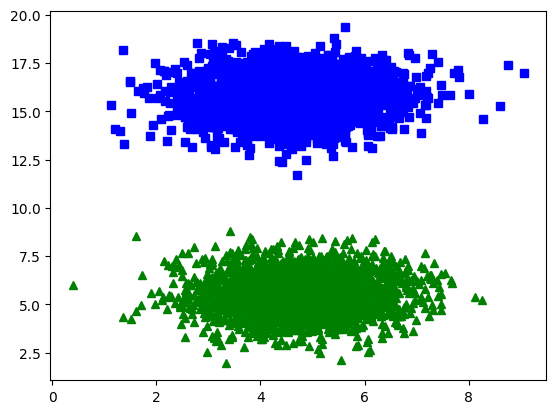

In [666]:
plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.show()

In [667]:
data = pd.DataFrame(X, columns=["x1", "x2"])
data["y"]=y

In [678]:
data.to_csv("Q2Dataset.csv", index=False)

In [669]:
weights = np.random.rand(data.shape[1]-1)
weights

array([0.75798771, 0.30654611])

##Reading Data

In [35]:
data = pd.read_csv('Q2Dataset.csv')
data

,x1,x2,y
0,2.605446,14.302660,1
1,5.177405,3.231283,-1
2,5.837689,3.798322,-1
3,3.783833,15.834580,1
4,4.468544,5.576403,-1
...,...,...,...
4995,3.648918,15.301408,1
4996,3.916278,4.460764,-1
4997,4.639271,16.177760,1
4998,3.883838,17.011286,1


##Perceptron

In [36]:
# bias=1
learning_rate = 0.1
epochs = 20


In [37]:
def perceptron_activation(weighted_sum):
  return np.where(weighted_sum>0.5,1 , -1)

def update_weights(row_j, weights, learning_rate, target, prediction):
  updated_weights = []
  for row, weight in zip(row_j, weights):
    updated_weights.append(weight+learning_rate*(target-prediction)*row)
  return updated_weights

In [38]:
def perceptron(data, labels, learning_rate=0.01, epochs=10):
  t = 0
  correct_pred = 0
  weights = np.array([0.75798771, 0.30654611])
  epoch_loss= []
  epoch_accuracy = []
  classification_error = 0
  while True:
    iter_loss = []
    classification_error = 0
    correct_pred = 0
    for j in range(len(data)):
      row_j = data.iloc[j]
      target = labels.iloc[j]
      weighted_sum = np.dot(row_j, weights)+1
      prediction = perceptron_activation(weighted_sum)
      if(prediction==target):
        correct_pred+=1
      classification_error += (1/len(data))*(abs(1/2*(target-prediction)))
      weights = update_weights(row_j, weights, learning_rate, target, prediction)
    t=t+1
    accuracy = correct_pred/len(data)
    epoch_accuracy.append(accuracy)
    epoch_loss.append(classification_error)
    print(f"Epoch {t} loss: {classification_error}")
    print(f"Epoch {t} accuracy: {accuracy}")
    print(f"Weight: {weights}", "\n")

    if(classification_error <= 0.10 and t<30):
      return weights
      break;


  print(f"\nAverage loss of all epochs {sum(epoch_loss)/len(epoch_loss)}")
  return weights


def pred_perceptron(data, weights):
  w_sum =  np.dot(data, weights)
  return perceptron_activation(w_sum)

In [39]:
train_data, test_data = train_test_split(data , test_size=0.2, random_state=42)
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

In [40]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores = []

save_weights = []
for train_index, val_index in kf.split(X_train):
    print(f"****************** K-FOLD: {len(mse_scores)+1} ******************")
    train_data, val_data = X_train.iloc[train_index], X_train.iloc[val_index]
    train_labels, val_labels = y_train.iloc[train_index], y_train.iloc[val_index]

    weights = perceptron(train_data, train_labels)
    save_weights.append(weights)

    val_pred = pred_perceptron(val_data, weights)
    val_mse = mean_squared_error(val_labels, val_pred)
    mse_scores.append(val_mse)

average_loss = sum(mse_scores)/len(mse_scores)
print("Average Validation Loss:", average_loss)

****************** K-FOLD: 1 ******************
Epoch 1 loss: 0.059444444444444536
Epoch 1 accuracy: 0.9405555555555556
Weight: [-1.9506886202739564, 0.9456374917359338] 

****************** K-FOLD: 2 ******************
Epoch 1 loss: 0.05833333333333342
Epoch 1 accuracy: 0.9416666666666667
Weight: [-1.946699075861729, 0.9345850858111171] 

****************** K-FOLD: 3 ******************
Epoch 1 loss: 0.05611111111111118
Epoch 1 accuracy: 0.9438888888888889
Weight: [-1.8760023174022067, 0.9972018484519933] 

****************** K-FOLD: 4 ******************
Epoch 1 loss: 0.060000000000000095
Epoch 1 accuracy: 0.94
Weight: [-2.010089737603247, 1.0635643157803074] 

****************** K-FOLD: 5 ******************
Epoch 1 loss: 0.05694444444444452
Epoch 1 accuracy: 0.9430555555555555
Weight: [-1.9493622162734687, 0.9913028791847809] 

****************** K-FOLD: 6 ******************
Epoch 1 loss: 0.05666666666666674
Epoch 1 accuracy: 0.9433333333333334
Weight: [-1.9090679821160201, 0.85928925

In [41]:
save_weights

[[-1.9506886202739564, 0.9456374917359338],
 [-1.946699075861729, 0.9345850858111171],
 [-1.8760023174022067, 0.9972018484519933],
 [-2.010089737603247, 1.0635643157803074],
 [-1.9493622162734687, 0.9913028791847809],
 [-1.9090679821160201, 0.8592892542613697],
 [-1.9431209044239586, 0.9434420914044277],
 [-1.8795174253419054, 0.9929075341078761],
 [-1.9604334886530956, 0.8327055194918338],
 [-1.958380890390939, 0.9396882063532017]]

In [42]:
correct_pred=0
classification_error=0
predA = []
for j in range(len(X_test)):
  row_j = X_test.iloc[j]
  target = y_test.iloc[j]
  weighted_sum = np.dot(row_j, save_weights[5])+1
  prediction = perceptron_activation(weighted_sum)
  predA.append(prediction)
  if(prediction==target):
    correct_pred+=1
  classification_error += (1/len(data))*(abs(1/2*(y_test-prediction)))

accuracy = correct_pred/len(X_test)
print("Accuracy on test set is", accuracy)

Accuracy on test set is 0.982


## Pocket Algorithm

In [43]:
learning_rate = 0.1
epochs = 20


In [44]:
def perceptron_activation(weighted_sum):
  return np.where(weighted_sum>0.5,1 , -1)

def update_weights(row_j, weights, learning_rate, target, prediction):
  updated_weights = []
  for row, weight in zip(row_j, weights):
    updated_weights.append(weight+learning_rate*(target-prediction)*row)
  return updated_weights

In [48]:
def pocket_algorithm(data, labels, learning_rate=0.01, epochs=20):
  t = 0
  correct_pred = 0
  weights = np.array([0.03798771, 0.0654611])
  best_weights = weights.copy()
  best_classification_error=float('inf')
  epoch_loss= []
  classification_error = 0
  epoch_accuracy = []
  for i in range(epochs):
    iter_loss = []
    classification_error = 0
    correct_pred = 0
    for j in range(len(data)):
      row_j = data.iloc[j]
      target = labels.iloc[j]
      weighted_sum = np.dot(row_j, weights)+1
      prediction = perceptron_activation(weighted_sum)
      if(prediction==target):
        correct_pred+=1
      classification_error += (1/len(data))*(abs(1/2*(target-prediction)))
      weights = update_weights(row_j, weights, learning_rate, target, prediction)
    t=t+1
    accuracy = correct_pred/len(data)
    epoch_accuracy.append(accuracy)
    epoch_loss.append(classification_error)
    print(f"Epoch {i+1} loss: {classification_error}")
    print(f"Epoch {i+1} accuracy: {accuracy}")
    print(f"Weight: {weights}", "\n")


    if classification_error<best_classification_error:
      best_classification_error=classification_error
      best_weights=weights.copy()

    if(classification_error == 0.0 and t<30):
      return best_weights
      break;

  print(f"Best Weights: {best_weights}")
  print(f"Lowest error: {best_classification_error}","\n")
  # print(f"\nAverage loss of all epochs {sum(epoch_loss)/len(epoch_loss)}")
  return best_weights


def pred_perceptron(data, weights):
  w_sum =  np.dot(data, weights)
  return perceptron_activation(w_sum)

In [49]:
train_data, test_data = train_test_split(data , test_size=0.2, random_state=42)
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

In [50]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores = []

save_weights=[]
for train_index, val_index in kf.split(X_train):
    print(f"****************** K-FOLD: {len(mse_scores)+1} ******************")
    train_data, val_data = X_train.iloc[train_index], X_train.iloc[val_index]
    train_labels, val_labels = y_train.iloc[train_index], y_train.iloc[val_index]

    weights = pocket_algorithm(train_data, train_labels)
    save_weights.append(weights)


    val_pred = pred_perceptron(val_data, weights)
    val_mse = mean_squared_error(val_labels, val_pred)
    mse_scores.append(val_mse)

average_loss = sum(mse_scores)/len(mse_scores)
print("Average Validation Loss:", average_loss)

****************** K-FOLD: 1 ******************
Epoch 1 loss: 0.05222222222222227
Epoch 1 accuracy: 0.9477777777777778
Weight: [-1.9205216247668373, 0.9341454137679781] 

Epoch 2 loss: 0.03972222222222219
Epoch 2 accuracy: 0.9602777777777778
Weight: [-2.3032997052438975, 1.2348624299564095] 

Epoch 3 loss: 0.03166666666666658
Epoch 3 accuracy: 0.9683333333333334
Weight: [-2.4283625798631165, 1.2848370720378612] 

Epoch 4 loss: 0.03027777777777769
Epoch 4 accuracy: 0.9697222222222223
Weight: [-2.526750834097301, 1.3281228667714406] 

Epoch 5 loss: 0.029999999999999916
Epoch 5 accuracy: 0.97
Weight: [-2.5787606764025863, 1.4083296619395724] 

Epoch 6 loss: 0.03027777777777769
Epoch 6 accuracy: 0.9697222222222223
Weight: [-2.6112223503616616, 1.3815636468748773] 

Epoch 7 loss: 0.029999999999999916
Epoch 7 accuracy: 0.97
Weight: [-2.6641157765878676, 1.4556948416247633] 

Epoch 8 loss: 0.02972222222222214
Epoch 8 accuracy: 0.9702777777777778
Weight: [-2.6880492957925726, 1.472221251562454

In [51]:
correct_pred=0
classification_error=0
predA = []
for j in range(len(X_test)):
  row_j = X_test.iloc[j]
  target = y_test.iloc[j]
  weighted_sum = np.dot(row_j, save_weights[4])+1
  prediction = perceptron_activation(weighted_sum)
  predA.append(prediction)
  if(prediction==target):
    correct_pred+=1
  classification_error += (1/len(data))*(abs(1/2*(y_test-prediction)))

accuracy = correct_pred/len(X_test)
print("Accuracy on test set is", accuracy)

Accuracy on test set is 0.982
